In [1]:
!apt-get update
!apt-get install -y libsm6 libxext6 libxrender-dev libgl1-mesa-glx
!pip install trdg

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease              
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease                        
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.2-1).
libxext6 is already the newest version (2:1.3.3-1).
libxrender-dev is already the newest version (1:0.9.10-1).
libgl1-mesa-glx is already the ne

In [2]:
from trdg.generators import GeneratorFromRandom
import ocr_source.batch_functions as batch_functions
import ocr_source.models as models
import ocr_source.custom_callbacks as custom_callbacks
import ocr_source.inference as inference
import ocr_source.losses as losses

import time
import importlib
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.python.client import device_lib
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession


# *********** MAGIC LINES ****************
# you might need this if training crashes due GPU memory overload
# or you get CuDNN load failure

#check for gpu
print(tf.config.list_physical_devices('GPU'))

#for tf2 magic lines to prevent razer from crashing
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)



#*************  PARAMETERS *******************
batch_size = 12
img_h = 32

# list of all characters
# map each color to an integer, a "label" and reverse mapping
all_chars = "0123456789"
num_chars = len(all_chars)
char_to_lbl_dict = dict((char, ind) for ind, char in enumerate(all_chars))
lbl_to_char_dict = dict((ind, char) for ind, char in enumerate(all_chars))


# ************** DATA GENERATORS *********************
#use trdg for the base generator of text
base_generator = GeneratorFromRandom(use_symbols=False, use_letters=False, background_type=1)

#add some more augmentation with keras ImageDataGenerator
keras_augm = ImageDataGenerator(rotation_range=2.0, width_shift_range=5.0, height_shift_range=5.0,
                                shear_range=4.0, zoom_range=0.1)

#the actual datagenerator for training and visualizations (and validation)
dg_params = {"batch_size": batch_size,"img_h": img_h, "keras_augmentor": keras_augm,
             "char_to_lbl_dict": char_to_lbl_dict}

datagen = batch_functions.OCR_generator(base_generator, **dg_params)
val_datagen = batch_functions.OCR_generator(base_generator, **dg_params, validation=True)


#*******MODEL******
model = models.make_standard_CRNN(img_h, num_chars)


#********CALLBACKS AND LOSSES****************
# get the cool outputs
predvis = custom_callbacks.PredVisualize(model,val_datagen, lbl_to_char_dict, printing=True)
model_saver = custom_callbacks.make_save_model_cb()
custom_loss = losses.custom_ctc()


#********COMPILE, SAVE MODEL**************
model.compile(loss=custom_loss, optimizer="Adam")
tf.keras.models.save_model(model, "saved_models", overwrite=True, include_optimizer=False)

Missing modules for handwritten text generation.
[]
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_models/assets


  ...
    to  
  ['...']
Train for 500 steps
Epoch 1/10
499/500 [============================>.] - ETA: 0s - loss: 15.9685WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/keras/backend.py:5811: sparse_to_dense (from tensorflow.python.ops.sparse_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


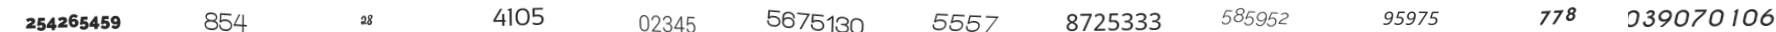

predictions ['22666', '351', '', '41105', '7', '5675', '35527', '725333', '636662', '95976', '775', '36077106']
500/500 [==============================] - 66s 132ms/step - loss: 15.9471
Epoch 2/10
499/500 [============================>.] - ETA: 0s - loss: 2.8194

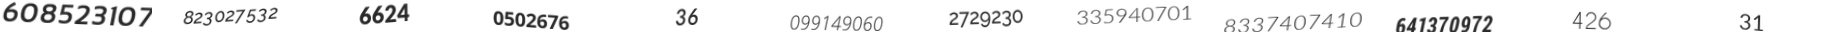

predictions ['608523107', '823027532', '6624', '0502676', '36', '099149050', '2729230', '335940701', '5337407410', '641370972', '426', '31']
500/500 [==============================] - 60s 120ms/step - loss: 2.8164
Epoch 3/10
499/500 [============================>.] - ETA: 0s - loss: 0.9462

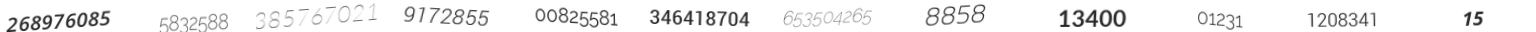

predictions ['268976085', '5832588', '385767024', '9172855', '00825581', '346418704', '653504265', '8858', '13400', '01231', '1208341', '15']
500/500 [==============================] - 60s 120ms/step - loss: 0.9444
Epoch 4/10
499/500 [============================>.] - ETA: 0s - loss: 0.5790

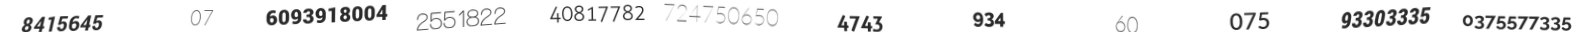

predictions ['8415645', '07', '6093918004', '2551822', '40817782', '72750650', '4743', '934', '60', '075', '93303335', '0375577335']
500/500 [==============================] - 62s 124ms/step - loss: 0.5787
Epoch 5/10
499/500 [============================>.] - ETA: 0s - loss: 0.4468WARNING:tensorflow:5 out of the last 5 calls to <function _make_execution_function.<locals>.distributed_function at 0x7fa08c6f0ae8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings is likely due to passing python objects instead of tensors. Also, tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. Please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for more details.


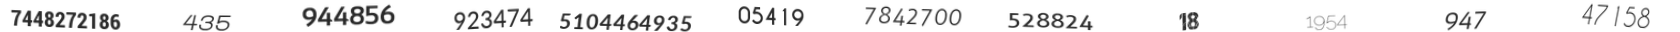

predictions ['7448272186', '435', '944856', '923474', '5104464935', '05419', '7842700', '528824', '18', '1954', '947', '47158']
500/500 [==============================] - 60s 121ms/step - loss: 0.4461
Epoch 6/10
499/500 [============================>.] - ETA: 0s - loss: 0.3278WARNING:tensorflow:6 out of the last 6 calls to <function _make_execution_function.<locals>.distributed_function at 0x7fa08c6f0ae8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings is likely due to passing python objects instead of tensors. Also, tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. Please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for more details.


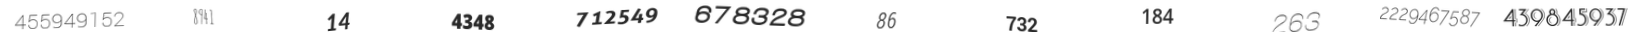

predictions ['455949152', '18941', '14', '4348', '712549', '678328', '86', '732', '184', '263', '2229467587', '439845937']
500/500 [==============================] - 293s 585ms/step - loss: 0.3272
Epoch 7/10
499/500 [============================>.] - ETA: 0s - loss: 0.2811

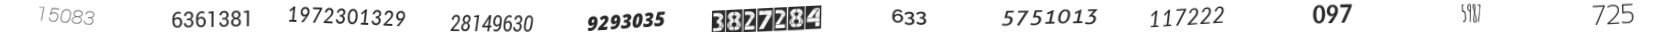

predictions ['15053', '6361381', '1972301329', '28149630', '9293035', '5327232', '633', '5751013', '117222', '097', '5987', '725']
500/500 [==============================] - 399s 799ms/step - loss: 0.2815
Epoch 8/10
499/500 [============================>.] - ETA: 0s - loss: 0.2282

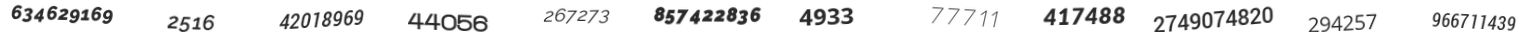

predictions ['634629169', '2516', '42018969', '414056', '267273', '857422836', '4933', '77711', '417488', '2749074820', '294257', '966711439']
500/500 [==============================] - 249s 498ms/step - loss: 0.2296
Epoch 9/10
499/500 [============================>.] - ETA: 0s - loss: 0.2220WARNING:tensorflow:7 out of the last 9 calls to <function _make_execution_function.<locals>.distributed_function at 0x7fa08c6f0ae8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings is likely due to passing python objects instead of tensors. Also, tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. Please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for more details.


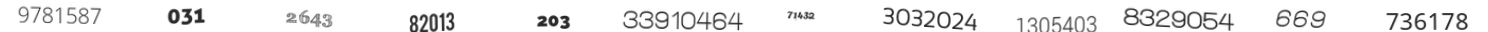

predictions ['9781587', '031', '2643', '82013', '203', '33910464', '71438', '3032024', '1305403', '8329054', '669', '736178']
500/500 [==============================] - 68s 136ms/step - loss: 0.2216
Epoch 10/10
499/500 [============================>.] - ETA: 0s - loss: 0.1812WARNING:tensorflow:8 out of the last 10 calls to <function _make_execution_function.<locals>.distributed_function at 0x7fa08c6f0ae8> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings is likely due to passing python objects instead of tensors. Also, tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. Please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for more details.


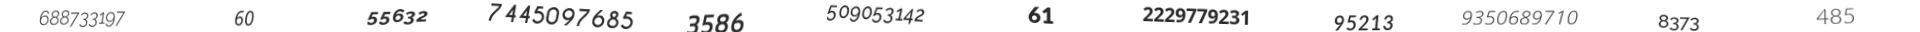

predictions ['688733197', '60', '55632', '7445097685', '3586', '509053142', '61', '2229779231', '95213', '9350689710', '8373', '485']
500/500 [==============================] - 71s 142ms/step - loss: 0.1816


In [3]:
H = model.fit(datagen, epochs=10, verbose=1, callbacks=[predvis, model_saver])

model loaded


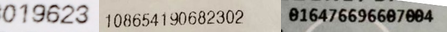

predictions ['019623', '1108654190682302', '18164766966676801']
inference time with image loading, model loading, preprocessing etc: 0.6966772079467773


In [4]:
# do a test inference from the files in inference_test_imgs/
# why there are errors?
# - The model has been not trained on the domain, character size,
# character separation, margins, background
# overfitting to training data so use more regularization etc etc
start = time.time()
inference.inference_from_folder(lbl_to_char_dict)
end = time.time()
print("inference time with image loading, model loading, preprocessing etc:", end - start)